In [7]:
import  numpy as np
import pandas as pd
df = pd.read_csv('data/CLRTAP_NVFR14_V21_GF.csv', sep='\t')

df.replace('', np.NaN)

# ref : https://github.com/ResidentMario/missingno

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
0,AT,Austria,As,NFR 2014-1,1B2aiv,1990,NaN,Mg,NR,2,NATIONAL TOTAL,Fugitive emissions oil: Refining / storage
1,AT,Austria,As,NFR 2014-1,1B2av,1990,NaN,Mg,NR,2,NATIONAL TOTAL,Distribution of oil products
2,AT,Austria,As,NFR 2014-1,1B2b,1990,NaN,Mg,NR,2,NATIONAL TOTAL,Fugitive emissions from natural gas (explorati...
3,AT,Austria,As,NFR 2014-1,1B2c,1990,NaN,Mg,NR,2,NATIONAL TOTAL,"Venting and flaring (oil, gas, combined oil an..."
4,AT,Austria,As,NFR 2014-1,1B2d,1990,NaN,Mg,NR,2,NATIONAL TOTAL,Other fugitive emissions from energy production
...,...,...,...,...,...,...,...,...,...,...,...,...
3794695,GB,United Kingdom,benzo(k),NFR 2014-1,1A3biii,2017,0.032174,Mg,NaN,2,NATIONAL TOTAL,Road transport: Heavy duty vehicles and buses
3794696,GB,United Kingdom,benzo(k),NFR 2014-1,1A3biv,2017,0.009202,Mg,NaN,2,NATIONAL TOTAL,Road transport: Mopeds & motorcycles
3794697,GB,United Kingdom,benzo(k),NFR 2014-1,1A3bv,2017,NaN,Mg,NaN,2,NATIONAL TOTAL,Road transport: Gasoline evaporation
3794698,GB,United Kingdom,benzo(k),NFR 2014-1,1A3bvi,2017,0.003249,Mg,NaN,2,NATIONAL TOTAL,Road transport: Automobile tyre and brake wear


In [4]:
df.isna().sum()

Country_Code                0
Country                     0
Pollutant_name              0
Format_name                 0
Sector_code                 0
Year                        0
Emissions             2741312
Unit                        0
Notation              2444683
VersionId                   0
Parent_sector_code     327600
Sector_name                 0
dtype: int64

<AxesSubplot:>

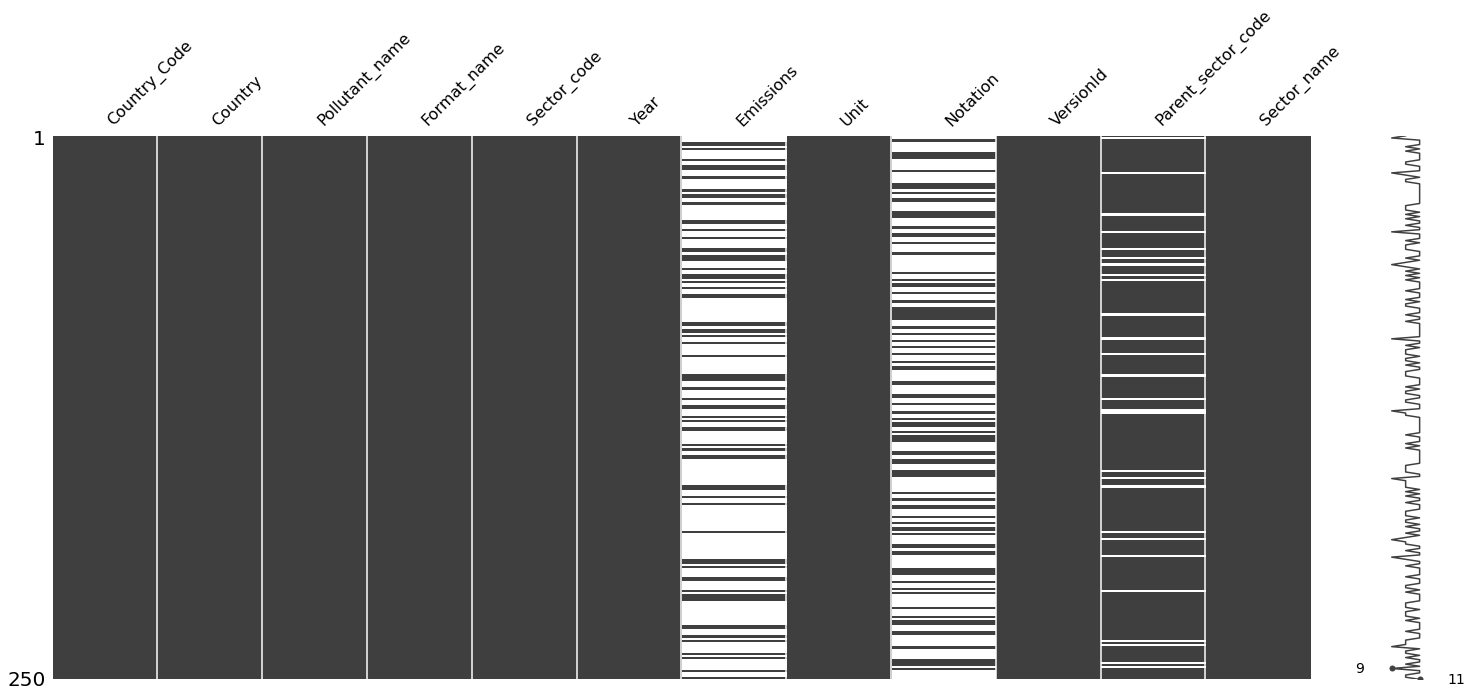

In [9]:
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

msno.matrix(df.sample(250))

<AxesSubplot:>

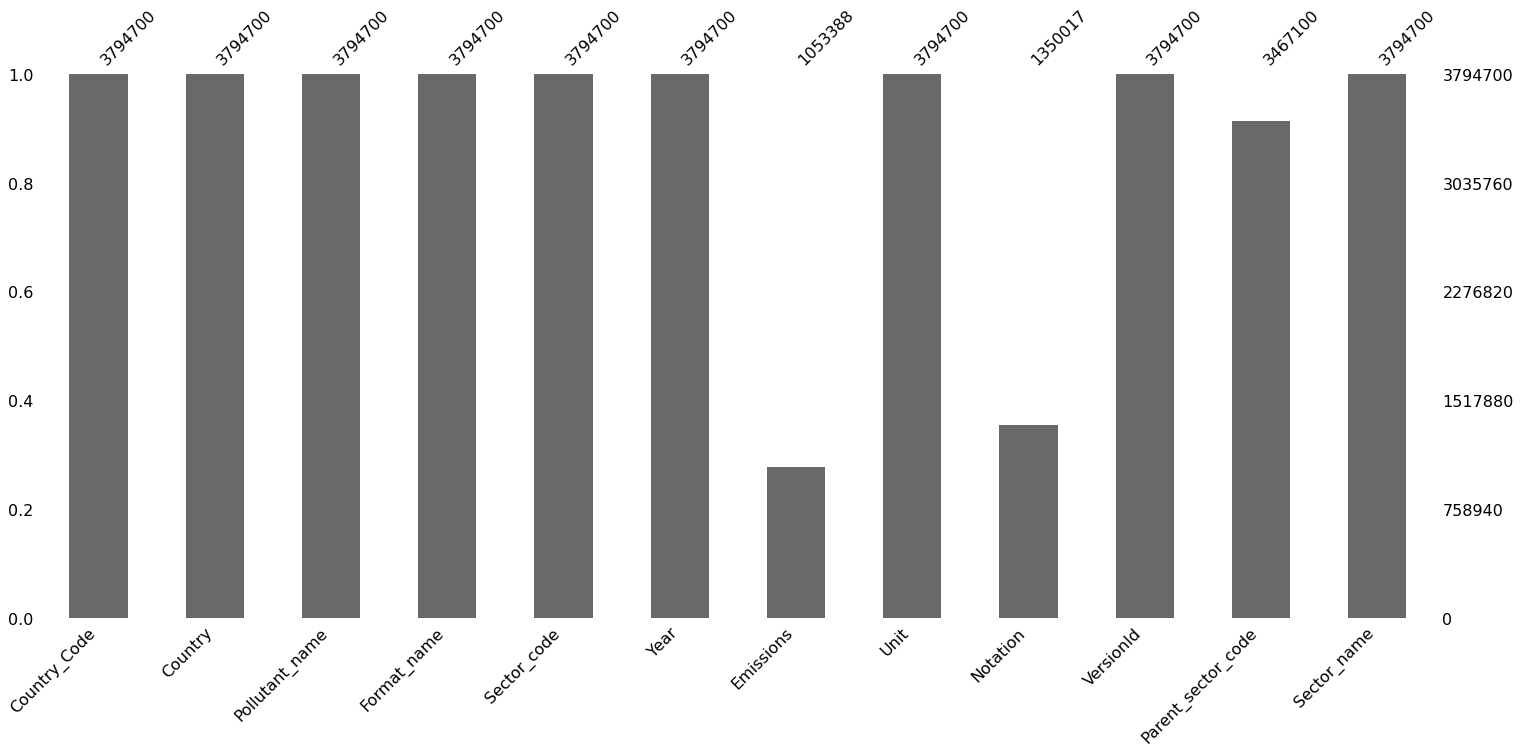

In [10]:
#msno.bar(df.sample(1000))

msno.bar(df)

<AxesSubplot:>

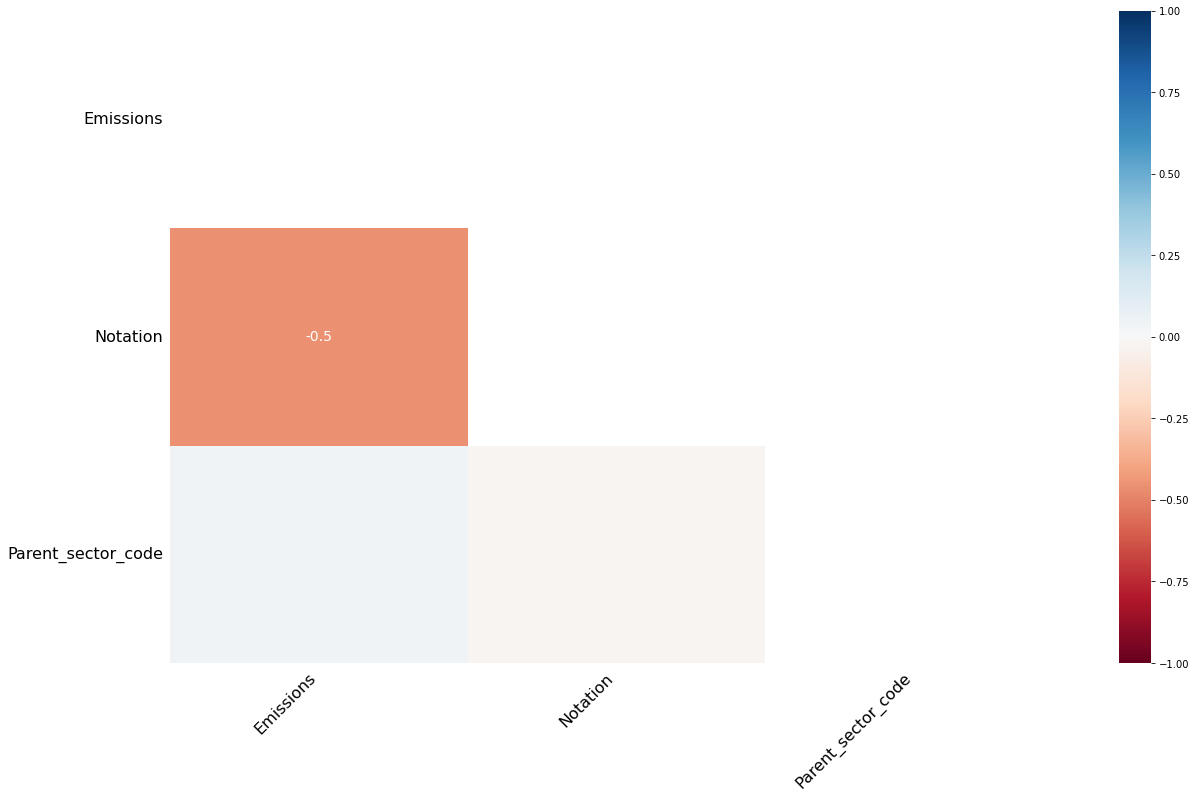

In [7]:
msno.heatmap(df)

In [13]:
import numpy as np

# df is a pandas.DataFrame instance
df = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]
corr_mat = df.isnull().corr()

<AxesSubplot:>

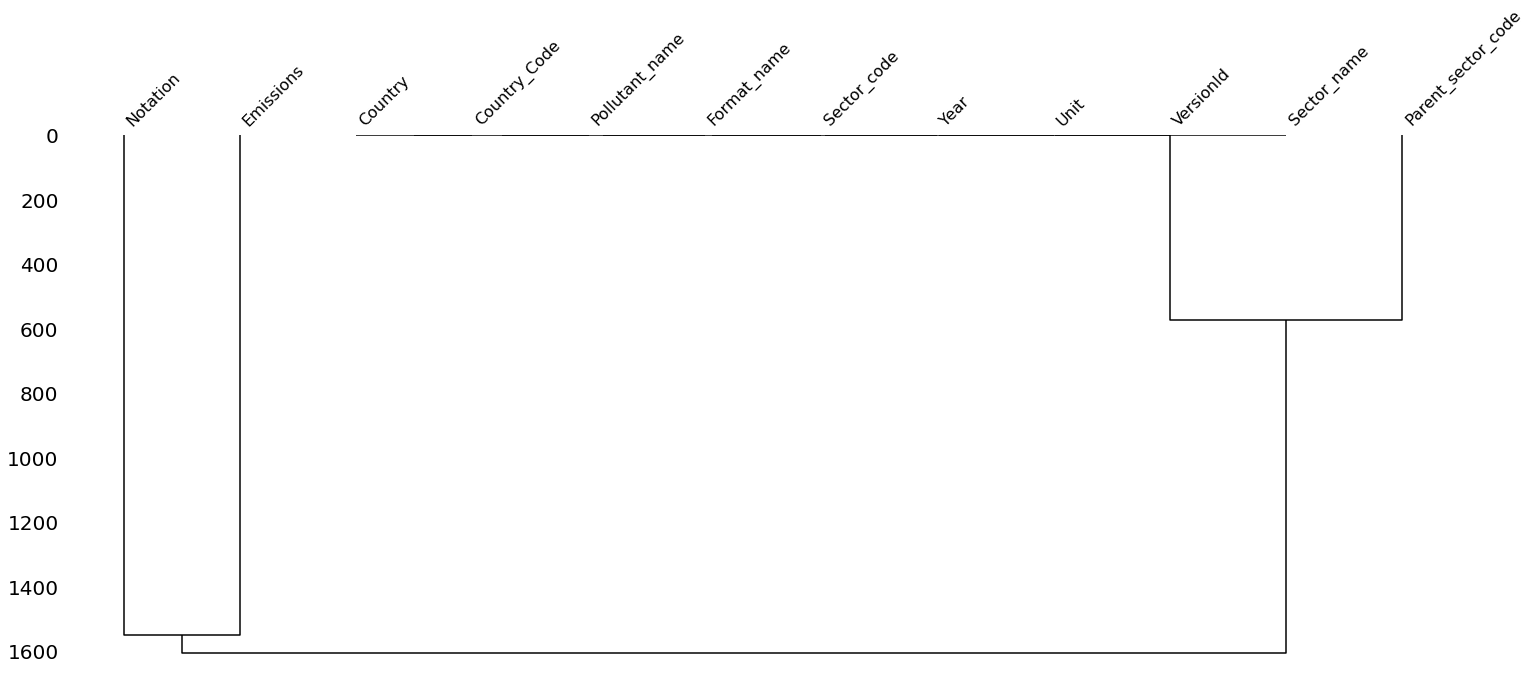

<AxesSubplot:>

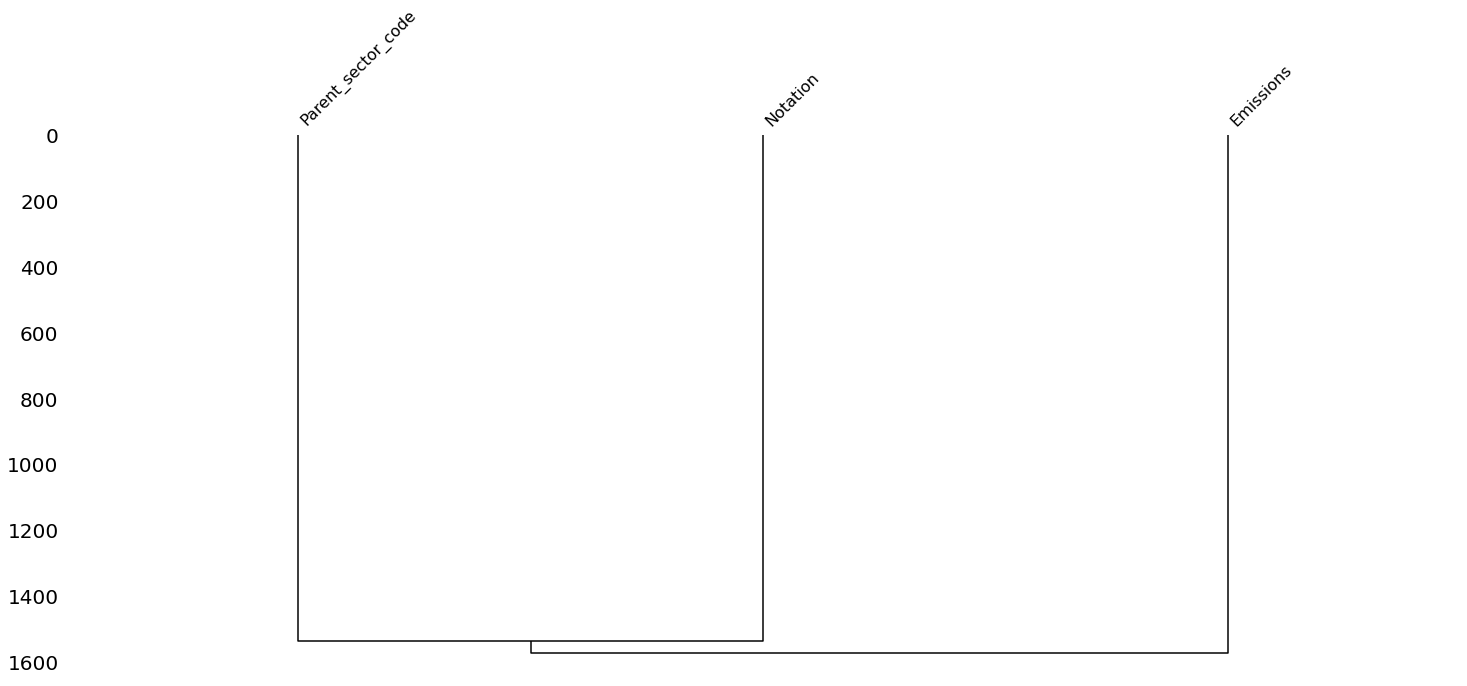

In [15]:
msno.dendrogram(df)

In [3]:
df2 = pd.read_csv('data/CLRTAP_NVFR14_V21_GF.csv', sep='\t')
df2 = df2.dropna(how='any', subset=['Emissions'])

unit_conditions = [
        (df2['Sector_code'] == 'Mg'),
        (df2['Sector_code'] == 'Gg'),
        (df2['Sector_code'] == 'g')]
unit_values = [df2['Emissions']/1000000, df2['Emissions']*1000000, df2['Emissions']/1000]
df2['Emissions'] = np.select(unit_conditions, unit_values, default=df2['Emissions'])
df2.drop(df2[df2['Country'] == 'EU28'].index, inplace=True)


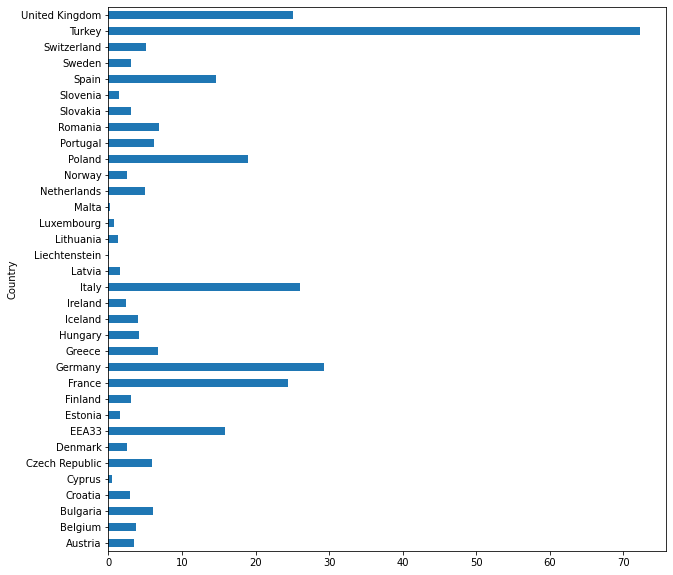

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

df_grouped = df2.sort_values('Emissions', ascending=False).groupby(["Country"]).mean()["Emissions"]
df_grouped.plot(kind='barh');

#plt.barh(x="Country", y="Emissions", data=df2)

#df2.plot.barh(x='Country', y='Emissions')

#plt.barh(figsize=(30,30))

In [ ]:
df_grouped = df.sort_values('Emissions', ascending=False).groupby(["Country"]).mean()["Emissions"]
df_grouped.plot(kind='barh');